In [5]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer

# Load the event logs
domestic_log = xes_importer.apply('Data/DomesticDeclarations.xes')
international_log = xes_importer.apply('Data/InternationalDeclarations.xes')

# Print the summary of the logs to understand the structure
domestic_summary = pm4py.get_event_attributes(domestic_log)
international_summary = pm4py.get_event_attributes(international_log)

domestic_summary, international_summary


parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

(['org:role', 'id', 'org:resource', 'concept:name', 'time:timestamp'],
 ['org:role', 'id', 'org:resource', 'concept:name', 'time:timestamp'])

In [6]:
import pandas as pd
from pm4py.statistics.traces.generic.log import case_statistics

# Get the unique activities
domestic_activities = set(event["concept:name"] for trace in domestic_log for event in trace)
international_activities = set(event["concept:name"] for trace in international_log for event in trace)

# Get the number of cases
domestic_case_count = len(domestic_log)
international_case_count = len(international_log)

# Get case durations (cycle times)
domestic_case_durations = case_statistics.get_all_case_durations(domestic_log, parameters={
    case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"
})
international_case_durations = case_statistics.get_all_case_durations(international_log, parameters={
    case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"
})

# Convert durations to DataFrame for easier analysis
domestic_durations_df = pd.DataFrame(domestic_case_durations)
international_durations_df = pd.DataFrame(international_case_durations)

{
    "domestic_activities": list(domestic_activities),
    "international_activities": list(international_activities),
    "domestic_case_count": domestic_case_count,
    "international_case_count": international_case_count,
    "domestic_case_durations_summary": domestic_durations_df.describe(),
    "international_case_durations_summary": international_durations_df.describe()
}


{'domestic_activities': ['Declaration REJECTED by PRE_APPROVER',
  'Declaration APPROVED by PRE_APPROVER',
  'Declaration FOR_APPROVAL by SUPERVISOR',
  'Declaration REJECTED by BUDGET OWNER',
  'Declaration SAVED by EMPLOYEE',
  'Declaration REJECTED by SUPERVISOR',
  'Declaration REJECTED by ADMINISTRATION',
  'Declaration FINAL_APPROVED by SUPERVISOR',
  'Declaration APPROVED by ADMINISTRATION',
  'Declaration FOR_APPROVAL by ADMINISTRATION',
  'Declaration APPROVED by BUDGET OWNER',
  'Request Payment',
  'Payment Handled',
  'Declaration REJECTED by EMPLOYEE',
  'Declaration SUBMITTED by EMPLOYEE',
  'Declaration FOR_APPROVAL by PRE_APPROVER',
  'Declaration REJECTED by MISSING'],
 'international_activities': ['Permit FINAL_APPROVED by SUPERVISOR',
  'Permit REJECTED by ADMINISTRATION',
  'Start trip',
  'Send Reminder',
  'Declaration APPROVED by SUPERVISOR',
  'Declaration REJECTED by MISSING',
  'Declaration REJECTED by ADMINISTRATION',
  'Declaration SUBMITTED by EMPLOYEE',
  

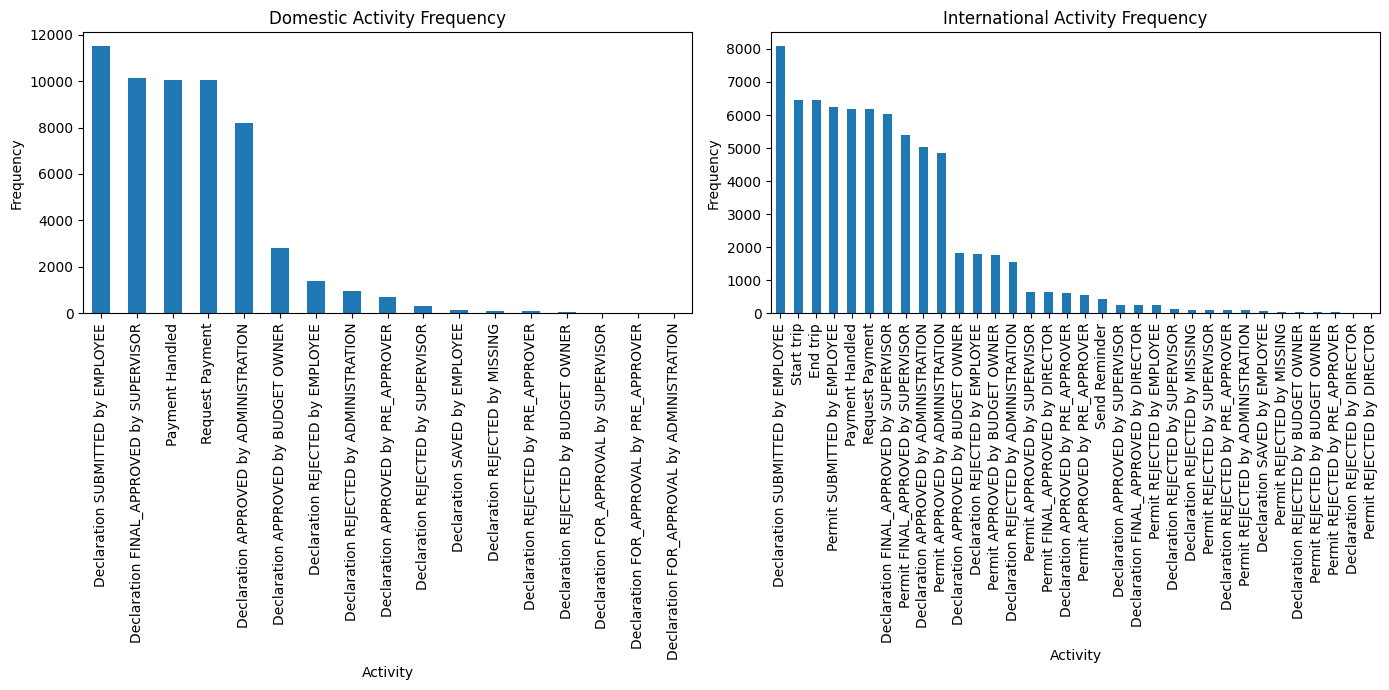

{'domestic_avg_duration': np.float64(995807.6361904762),
 'domestic_median_duration': np.float64(633356.0),
 'domestic_max_duration': np.float64(40545618.0),
 'international_avg_duration': np.float64(7469716.275236471),
 'international_median_duration': np.float64(5707155.0),
 'international_max_duration': np.float64(64108800.0),
 'domestic_activity_freq': {'Declaration SUBMITTED by EMPLOYEE': 11531,
  'Declaration FINAL_APPROVED by SUPERVISOR': 10131,
  'Payment Handled': 10044,
  'Request Payment': 10040,
  'Declaration APPROVED by ADMINISTRATION': 8202,
  'Declaration APPROVED by BUDGET OWNER': 2820,
  'Declaration REJECTED by EMPLOYEE': 1365,
  'Declaration REJECTED by ADMINISTRATION': 952,
  'Declaration APPROVED by PRE_APPROVER': 685,
  'Declaration REJECTED by SUPERVISOR': 293,
  'Declaration SAVED by EMPLOYEE': 135,
  'Declaration REJECTED by MISSING': 91,
  'Declaration REJECTED by PRE_APPROVER': 86,
  'Declaration REJECTED by BUDGET OWNER': 59,
  'Declaration FOR_APPROVAL by 

In [7]:
import matplotlib.pyplot as plt

# Calculate average, median, and max case duration for domestic and international processes
domestic_avg_duration = domestic_durations_df[0].mean()
domestic_median_duration = domestic_durations_df[0].median()
domestic_max_duration = domestic_durations_df[0].max()

international_avg_duration = international_durations_df[0].mean()
international_median_duration = international_durations_df[0].median()
international_max_duration = international_durations_df[0].max()

# Frequency of activities in both logs
domestic_activity_freq = pd.Series([event["concept:name"] for trace in domestic_log for event in trace]).value_counts()
international_activity_freq = pd.Series([event["concept:name"] for trace in international_log for event in trace]).value_counts()

# Visualization of activity frequencies
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
domestic_activity_freq.plot(kind='bar', title='Domestic Activity Frequency')
plt.xticks(rotation=90)
plt.xlabel('Activity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
international_activity_freq.plot(kind='bar', title='International Activity Frequency')
plt.xticks(rotation=90)
plt.xlabel('Activity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

{
    "domestic_avg_duration": domestic_avg_duration,
    "domestic_median_duration": domestic_median_duration,
    "domestic_max_duration": domestic_max_duration,
    "international_avg_duration": international_avg_duration,
    "international_median_duration": international_median_duration,
    "international_max_duration": international_max_duration,
    "domestic_activity_freq": domestic_activity_freq.to_dict(),
    "international_activity_freq": international_activity_freq.to_dict()
}
